In [1]:
#Importar librerias. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Cargar datos.
df=pd.read_csv("/home/jovyan/Tesis/DatosFINALES_CSV.csv")
df

,Fecha,Radiación
0,25/04/2014,257.700
1,25/04/2014,576.300
2,25/04/2014,312.100
3,30/06/2014,120.100
4,30/06/2014,96.200
...,...,...
51543,28/08/2024,664.932
51544,28/08/2024,388.378
51545,28/08/2024,146.314
51546,28/08/2024,5.053


In [3]:
#Transformar la columna "Fecha" a caracteres válidos para su lectura en pandas.
df['Fecha']=pd.to_datetime(df.Fecha)
print(df)
print(df.index)

           Fecha  Radiación
0     2014-04-25    257.700
1     2014-04-25    576.300
2     2014-04-25    312.100
3     2014-06-30    120.100
4     2014-06-30     96.200
...          ...        ...
51543 2024-08-28    664.932
51544 2024-08-28    388.378
51545 2024-08-28    146.314
51546 2024-08-28      5.053
51547 2024-08-28      1.479

[51548 rows x 2 columns]
RangeIndex(start=0, stop=51548, step=1)


/tmp/ipykernel_157/1139190249.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha']=pd.to_datetime(df.Fecha)


In [4]:
#Sustituir el índice por la columna "Fecha" y posteriormente, borrar esa columna que ya no se ocupará.
df.index=df.Fecha
df=df.drop('Fecha',axis=1)

In [5]:
#Generar una variable que contenga la suma de los datos por día.
df_res1=df["Radiación"].resample('1D').sum()

In [6]:
#Generar una variable que contenga la suma de los datos por mes.
df_res2=df_res1.resample('1M').sum()

/tmp/ipykernel_157/2702340322.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_res2=df_res1.resample('1M').sum()


In [7]:
#Generar slices para cada mes de todos los años. 
df_ene=df_res2.loc[df_res2.index.month==1]
df_feb=df_res2.loc[df_res2.index.month==2]
df_mar=df_res2.loc[df_res2.index.month==3]
df_abr=df_res2.loc[df_res2.index.month==4]
df_may=df_res2.loc[df_res2.index.month==5]
df_jun=df_res2.loc[df_res2.index.month==6]
df_jul=df_res2.loc[df_res2.index.month==7]
df_ago=df_res2.loc[df_res2.index.month==8]
df_sep=df_res2.loc[df_res2.index.month==9]
df_oct=df_res2.loc[df_res2.index.month==10]
df_nov=df_res2.loc[df_res2.index.month==11]
df_dic=df_res2.loc[df_res2.index.month==12]

In [8]:
#Convertir los slices anteriores en arreglos de numpy. 
ene=np.array(df_ene)
feb=np.array(df_feb)
mar=np.array(df_mar)
abr=np.array(df_abr)
may=np.array(df_may)
jun=np.array(df_jun)
jul=np.array(df_jul)
ago=np.array(df_ago)
sep=np.array(df_sep)
oct=np.array(df_oct)
nov=np.array(df_nov)
dic=np.array(df_dic)

In [9]:
#Imprimir los valores de los arreglos para su visualización previa a graficarlos. 
sumene=np.nansum(ene)
print("La suma de enero es:", sumene)
sumfeb = np.sum(feb)
print("La suma de febrero es:", sumfeb)
summar = np.sum(mar)
print("La suma de marzo es:", summar)
sumabr = np.sum(abr)
print("La suma de abril es:", sumabr)
summay = np.nansum(may)
print("La suma de mayo es:", summay)
sumjun = np.nansum(jun)
print("La suma de junio es:", sumjun)
sumjul = np.nansum(jul)
print("La suma de julio es:", sumjul)
sumago = np.nansum(ago)
print("La suma de agosto es:", sumago)
sumsep = np.nansum(sep)
print("La suma de septiembre es:", sumsep)
sumoct = np.nansum(oct)
print("La suma de octubre es:", sumoct)
sumnov = np.nansum(nov)
print("La suma de noviembre es:", sumnov)
sumdic = np.nansum(dic)
print("La suma diciembre es:", sumdic)

La suma de enero es: 1272520.812
La suma de febrero es: 1535956.3059999999
La suma de marzo es: 1817222.6879999998
La suma de abril es: 1861726.4919999999
La suma de mayo es: 1552856.6269999999
La suma de junio es: 1375898.0
La suma de julio es: 1428179.2200000002
La suma de agosto es: 1517349.2789999999
La suma de septiembre es: 1047492.003
La suma de octubre es: 1025284.973
La suma de noviembre es: 1178238.558
La suma diciembre es: 1144791.541


In [10]:
#Juntar los valores de cada mes en una sola variable.
sumas = np.array([sumene,sumfeb,summar,sumabr,summay,sumjun,sumjul,sumago,sumsep,sumoct,sumnov,sumdic])

Obtención de cuantiles $Q_1$, $Q_2$, $Q_3$

In [12]:
#Generar slices para cada mes de todos los años. Se repite el paso pero ahora con la suma diaria, no con la suma mensual.
df_eneC3=df_res1.loc[df_res1.index.month==1]
df_febC3=df_res1.loc[df_res1.index.month==2]
df_marC3=df_res1.loc[df_res1.index.month==3]
df_abrC3=df_res1.loc[df_res1.index.month==4]
df_mayC3=df_res1.loc[df_res1.index.month==5]
df_junC3=df_res1.loc[df_res1.index.month==6]
df_julC3=df_res1.loc[df_res1.index.month==7]
df_agoC3=df_res1.loc[df_res1.index.month==8]
df_sepC3=df_res1.loc[df_res1.index.month==9]
df_octC3=df_res1.loc[df_res1.index.month==10]
df_novC3=df_res1.loc[df_res1.index.month==11]
df_dicC3=df_res1.loc[df_res1.index.month==12]

In [13]:
#Convertir los slices anteriores en arreglos de numpy.
ene2=np.array(df_eneC3)
feb2=np.array(df_febC3)
mar2=np.array(df_marC3)
abr2=np.array(df_abrC3)
may2=np.array(df_mayC3)
jun2=np.array(df_junC3)
jul2=np.array(df_julC3)
ago2=np.array(df_agoC3)
sep2=np.array(df_sepC3)
oct2=np.array(df_octC3)
nov2=np.array(df_novC3)
dic2=np.array(df_dicC3)

In [14]:
#Obtener los cuantiles de cada arreglo. 
q1ene2 = np.quantile(ene2[ene2 > 0], 0.25)
q2ene2 = np.quantile(ene2[ene2 > 0], 0.5)
q3ene2 = np.quantile(ene2[ene2 > 0], 0.75)

q1feb2 = np.quantile(feb2[feb2 > 0], 0.25)
q2feb2 = np.quantile(feb2[feb2 > 0], 0.5)
q3feb2 = np.quantile(feb2[feb2 > 0], 0.75)

q1mar2 = np.quantile(mar2[mar2 > 0], 0.25)
q2mar2 = np.quantile(mar2[mar2 > 0], 0.5)
q3mar2 = np.quantile(mar2[mar2 > 0], 0.75)

q1abr2 = np.quantile(abr2[abr2 > 0], 0.25)
q2abr2 = np.quantile(abr2[abr2 > 0], 0.5)
q3abr2 = np.quantile(abr2[abr2 > 0], 0.75)

q1may2 = np.quantile(may2[may2 > 0], 0.25)
q2may2 = np.quantile(may2[may2 > 0], 0.5)
q3may2 = np.quantile(may2[may2 > 0], 0.75)

q1jun2 = np.quantile(jun2[jun2 > 0], 0.25)
q2jun2 = np.quantile(jun2[jun2 > 0], 0.5)
q3jun2 = np.quantile(jun2[jun2 > 0], 0.75)

q1jul2 = np.quantile(jul2[jul2 > 0], 0.25)
q2jul2 = np.quantile(jul2[jul2 > 0], 0.5)
q3jul2 = np.quantile(jul2[jul2 > 0], 0.75)

q1ago2 = np.quantile(ago2[ago2 > 0], 0.25)
q2ago2 = np.quantile(ago2[ago2 > 0], 0.5)
q3ago2 = np.quantile(ago2[ago2 > 0], 0.75)

q1sep2 = np.quantile(sep2[sep2 > 0], 0.25)
q2sep2 = np.quantile(sep2[sep2 > 0], 0.5)
q3sep2 = np.quantile(sep2[sep2 > 0], 0.75)

q1oct2 = np.quantile(oct2[oct2 > 0], 0.25)
q2oct2 = np.quantile(oct2[oct2 > 0], 0.5)
q3oct2 = np.quantile(oct2[oct2 > 0], 0.75)

q1nov2 = np.quantile(nov2[nov2 > 0], 0.25)
q2nov2 = np.quantile(nov2[nov2 > 0], 0.5)
q3nov2 = np.quantile(nov2[nov2 > 0], 0.75)

q1dic2 = np.quantile(dic2[dic2 > 0], 0.25)
q2dic2 = np.quantile(dic2[dic2 > 0], 0.5)
q3dic2 = np.quantile(dic2[dic2 > 0], 0.75)

In [15]:
#Almacenar los valores de Q1 de todos los meses en una variable, 
#los valores de Q2 en otra variable y los valores de Q3 en otra variable. 
q1f=np.array([q1ene2,q1feb2,q1mar2,q1abr2,q1may2,q1jun2,q1jul2,q1ago2,q1sep2,q1oct2,q1nov2,q1dic2])
q2f=np.array([q2ene2,q2feb2,q2mar2,q2abr2,q2may2,q2jun2,q2jul2,q2ago2,q2sep2,q2oct2,q2nov2,q2dic2])
q3f=np.array([q3ene2,q3feb2,q3mar2,q3abr2,q3may2,q3jun2,q3jul2,q3ago2,q3sep2,q3oct2,q3nov2,q3dic2])

Generar gráfico de caja y bigotes.

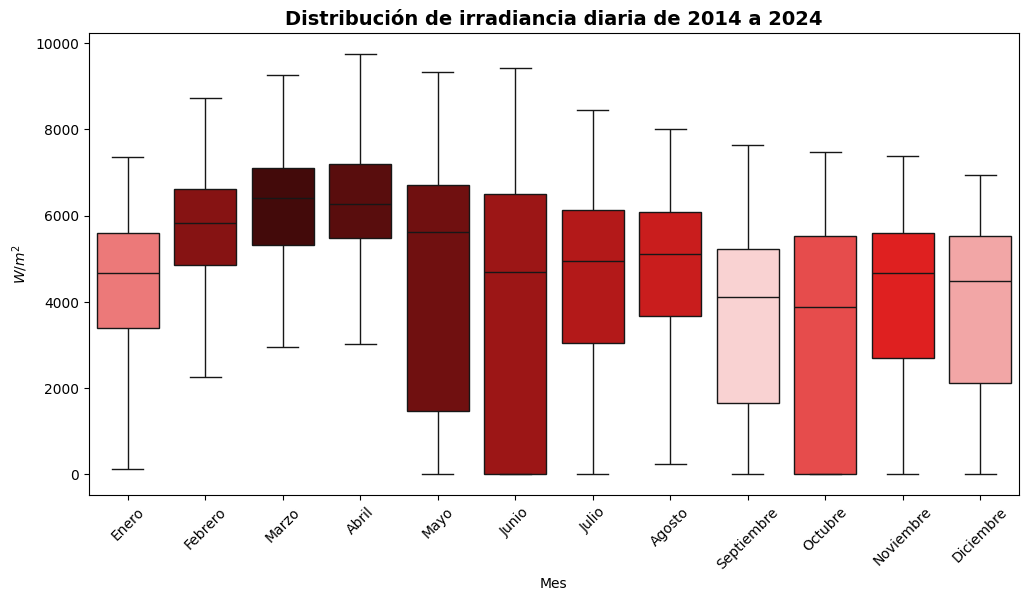

In [36]:
#Generar una variable que contenga los valores de Q2 para su uso posterior. 
arr = [ene2,feb2,mar2,abr2,may2,jun2,jul2,ago2,sep2,oct2,nov2,dic2]

#Configurar la paleta de colores del gráfico. 
color = ["#FF6666","#990000","#4D0000","#660000","#800000","#B20000","#CC0000","#E60000","#FFCCCC","#FF3333","#FF0000","#FF9999"]

#Crear la figura.
plt.figure(figsize=(12, 6))

#Representar la información mediante un gráfico de caja y bigotes.
sns.boxplot(data=arr,showfliers=False, palette=color)

#Configurar la vista del gráfico general.
plt.xticks(ticks=[0, 1, 2, 3,4,5,6,7,8,9,10,11], labels= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"],)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel(r'$W/m^2$')
plt.title('Distribución de irradiancia diaria de 2014 a 2024',fontsize = 14, fontweight = "bold")

#plt.savefig("DistribucionIrradianciaDiaria.svg", format="svg")
plt.show()